## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [1]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv('/home/rgukt-basar/MachineLearning/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
#2 Check the shape of the DataFrame (rows, columns)

In [ ]:
#3 Look at the data types of the columns

In [2]:
#4 Check for missing  values if any, replace with appropriate values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [3]:
#5 Prepare  X (independent variables) and y (dependent variable)
x=df.drop(columns=['price'])
y=df['price']

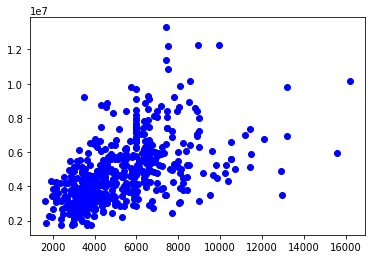

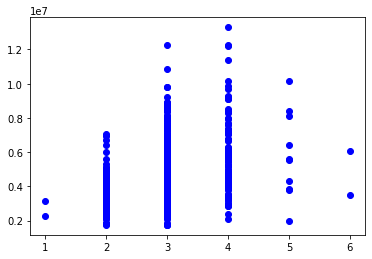

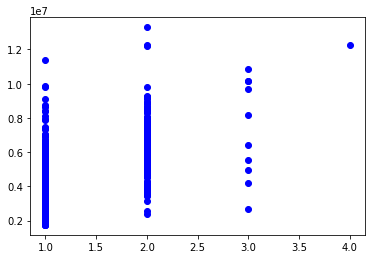

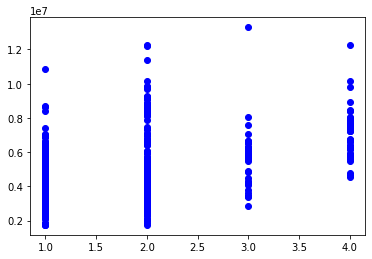

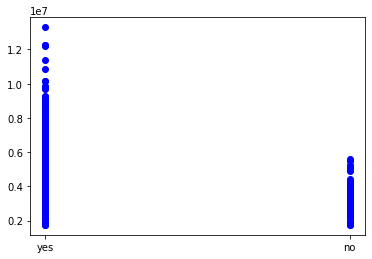

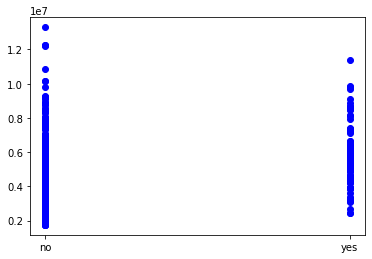

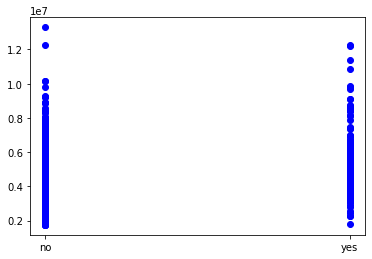

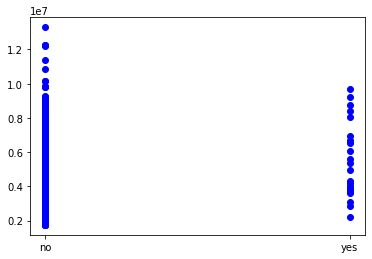

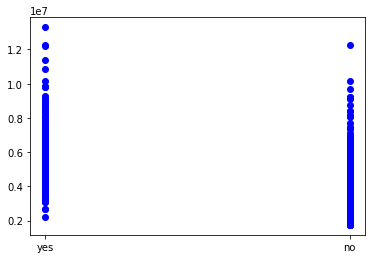

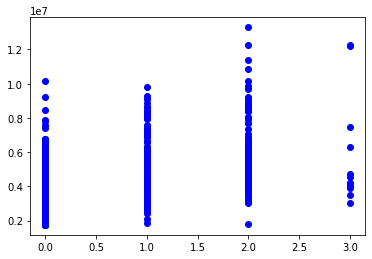

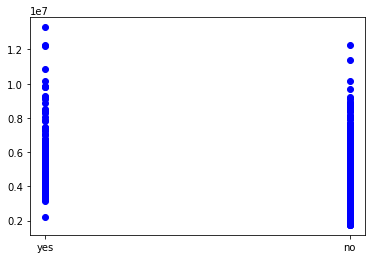

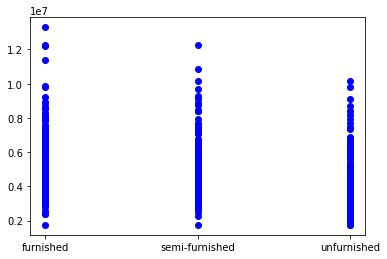

In [6]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
import matplotlib.pyplot as plt 
for i in x:
    plt.scatter(x[i],y,color="blue")
    #plt.plot(x[i],y,color="red")
    plt.show()

In [9]:
#7 Encoding categorical data in X
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['mainroad']=lb.fit_transform(df['mainroad'])
df['guestroom']=lb.fit_transform(df['guestroom'])
df['basement']=lb.fit_transform(df['basement'])
df['hotwaterheating']=lb.fit_transform(df['hotwaterheating'])
df['airconditioning']=lb.fit_transform(df['airconditioning'])
df['prefarea']=lb.fit_transform(df['prefarea'])
#basement	hotwaterheating	airconditioning	parking	prefarea	
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [11]:
#8  Avoiding the Dummy Variable Trap
t=pd.get_dummies(df,columns=['furnishingstatus'],drop_first=True).replace({True:0,False:1})
t

/tmp/ipykernel_8531/1870713494.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  t=pd.get_dummies(df,columns=['furnishingstatus'],drop_first=True).replace({True:0,False:1})


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,1,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,1,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,1


In [12]:
#9 Apply feature scaling on numerical variables
num=df.select_dtypes(include=['number'])

In [22]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split
X=t.drop(columns=['price'])
Y=t['price']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [23]:
#11 Fitting Multiple Linear Regression to the Trainingl
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [25]:
#12 Predict on the train set and calculate the error = y_pred - y_train
y_pred=ml.predict(x_train)
error=y_pred-y_train

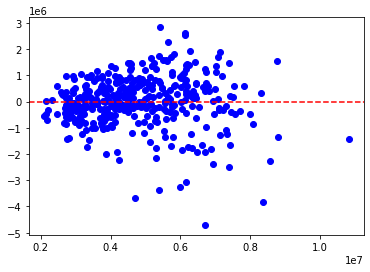

In [29]:
#13  Residual plot - plot y_pred in x axis and errors in y axis
import matplotlib.pyplot as plt
res=y_train-y_pred
plt.scatter(y_pred,error,color="blue")
plt.axhline(y=0,color='r',linestyle='--')
plt.show()
#plt.plot(y_pred,error)

In [ ]:
#14  Predic on the test set

In [ ]:
#15 Residual plot - plot y_pred in x axis and errors in y axis

In [ ]:
#16 Print Mean Squared Error and R Squared Value

In [ ]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)